# Project - Car origin prediction using Logistic Regression

#### Importing libraries

In [10]:
from warnings import filterwarnings
filterwarnings("ignore")
import pandas as pd

In [11]:
A=pd.read_csv("C:/Users/HP/Desktop/Cars93.csv")
A.head(20)

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i
5,6,Buick,Century,Midsize,14.2,15.7,17.3,22,31,Driver only,...,6,189,105,69,41,28.0,16.0,2880,USA,Buick Century
6,7,Buick,LeSabre,Large,19.9,20.8,21.7,19,28,Driver only,...,6,200,111,74,42,30.5,17.0,3470,USA,Buick LeSabre
7,8,Buick,Roadmaster,Large,22.6,23.7,24.9,16,25,Driver only,...,6,216,116,78,45,30.5,21.0,4105,USA,Buick Roadmaster
8,9,Buick,Riviera,Midsize,26.3,26.3,26.3,19,27,Driver only,...,5,198,108,73,41,26.5,14.0,3495,USA,Buick Riviera
9,10,Cadillac,DeVille,Large,33.0,34.7,36.3,16,25,Driver only,...,6,206,114,73,43,35.0,18.0,3620,USA,Cadillac DeVille


In [12]:
A.columns=['id', 'Manufacturer', 'model', 'Type', 'MinPrice', 'Price',
       'MaxPrice', 'MPGcity', 'MPGhighway', 'AirBags', 'DriveTrain',
       'Cylinders', 'EngineSize', 'Horsepower', 'RPM', 'Revpermile',
       'Mantransavail', 'Fueltankcapacity', 'Passengers', 'Length',
       'Wheelbase', 'Width', 'Turncircle', 'Rearseatroom', 'Luggageroom',
       'Weight', 'Origin', 'Make']

In [13]:
A.shape

(93, 28)

In [14]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                93 non-null     int64  
 1   Manufacturer      93 non-null     object 
 2   model             93 non-null     object 
 3   Type              93 non-null     object 
 4   MinPrice          93 non-null     float64
 5   Price             93 non-null     float64
 6   MaxPrice          93 non-null     float64
 7   MPGcity           93 non-null     int64  
 8   MPGhighway        93 non-null     int64  
 9   AirBags           89 non-null     object 
 10  DriveTrain        93 non-null     object 
 11  Cylinders         93 non-null     object 
 12  EngineSize        93 non-null     float64
 13  Horsepower        93 non-null     int64  
 14  RPM               93 non-null     int64  
 15  Revpermile        93 non-null     int64  
 16  Mantransavail     93 non-null     object 
 17 

In [15]:
A.describe

<bound method NDFrame.describe of     id Manufacturer    model     Type  MinPrice  Price  MaxPrice  MPGcity  \
0    1        Acura  Integra    Small      12.9   15.9      18.8       25   
1    2        Acura   Legend  Midsize      29.2   33.9      38.7       18   
2    3         Audi       90  Compact      25.9   29.1      32.3       20   
3    4         Audi      100  Midsize      30.8   37.7      44.6       19   
4    5          BMW     535i  Midsize      23.7   30.0      36.2       22   
..  ..          ...      ...      ...       ...    ...       ...      ...   
88  89   Volkswagen  Eurovan      Van      16.6   19.7      22.7       17   
89  90   Volkswagen   Passat  Compact      17.6   20.0      22.4       21   
90  91   Volkswagen  Corrado   Sporty      22.9   23.3      23.7       18   
91  92        Volvo      240  Compact      21.8   22.7      23.5       21   
92  93        Volvo      850  Midsize      24.8   26.7      28.5       20   

    MPGhighway             AirBags  ... P

## Dealing with missing data

In [16]:
W=pd.DataFrame(A.isna().sum(),columns=['ct'])
for i in W[W.ct > 0].index:
    if A[i].dtypes=='object':
        mode=A[i].mode()[0]
        A[i]=A[i].fillna(mode)
    else:
        mean=A[i].mean()
        A[i]=A[i].fillna(mean)
A.isna().sum()

id                  0
Manufacturer        0
model               0
Type                0
MinPrice            0
Price               0
MaxPrice            0
MPGcity             0
MPGhighway          0
AirBags             0
DriveTrain          0
Cylinders           0
EngineSize          0
Horsepower          0
RPM                 0
Revpermile          0
Mantransavail       0
Fueltankcapacity    0
Passengers          0
Length              0
Wheelbase           0
Width               0
Turncircle          0
Rearseatroom        0
Luggageroom         0
Weight              0
Origin              0
Make                0
dtype: int64

### Split data into X and Y

In [21]:
X=A.drop(labels=["Origin","id"],axis=1)
Y=A[["Origin"]]
X.head(20)

,Manufacturer,model,Type,MinPrice,Price,MaxPrice,MPGcity,MPGhighway,AirBags,DriveTrain,...,Fueltankcapacity,Passengers,Length,Wheelbase,Width,Turncircle,Rearseatroom,Luggageroom,Weight,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,...,13.2,5,177,102,68,37,26.50000,11.000000,2705,Acura Integra
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,18.0,5,195,115,71,38,30.00000,15.000000,3560,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,16.9,5,180,102,67,37,28.00000,14.000000,3375,Audi 90
3,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver only,Front,...,21.1,6,193,106,70,37,31.00000,17.000000,3405,Audi 100
4,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,21.1,4,186,109,69,39,27.00000,13.000000,3640,BMW 535i
5,Buick,Century,Midsize,14.2,15.7,17.3,22,31,Driver only,Front,...,16.4,6,189,105,69,41,28.00000,16.000000,2880,Buick Century
6,Buick,LeSabre,Large,19.9,20.8,21.7,19,28,Driver only,Front,...,18.0,6,200,111,74,42,30.50000,17.000000,3470,Buick LeSabre
7,Buick,Roadmaster,Large,22.6,23.7,24.9,16,25,Driver only,Rear,...,23.0,6,216,116,78,45,30.50000,21.000000,4105,Buick Roadmaster
8,Buick,Riviera,Midsize,26.3,26.3,26.3,19,27,Driver only,Front,...,18.8,5,198,108,73,41,26.50000,14.000000,3495,Buick Riviera
9,Cadillac,DeVille,Large,33.0,34.7,36.3,16,25,Driver only,Front,...,18.0,6,206,114,73,43,35.00000,18.000000,3620,Cadillac DeVille


In [20]:
Y.head(20)

,Origin
0,non-USA
1,non-USA
2,non-USA
3,non-USA
4,non-USA
5,USA
6,USA
7,USA
8,USA
9,USA


In [22]:
X.shape

(93, 26)

## EDA

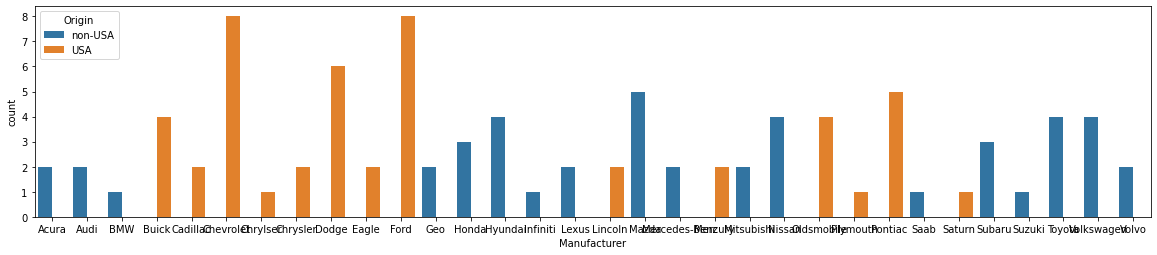

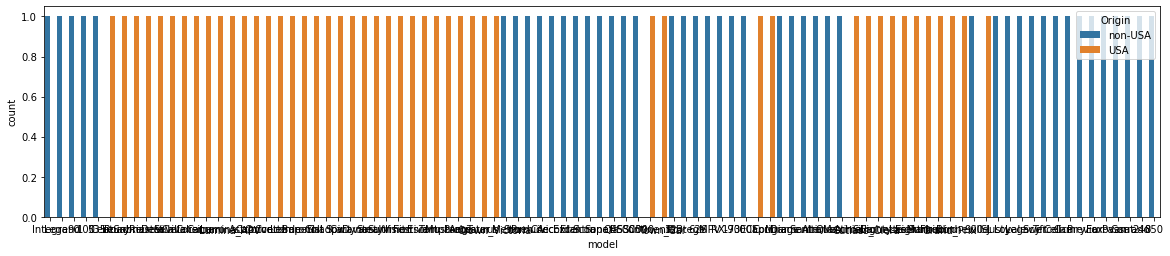

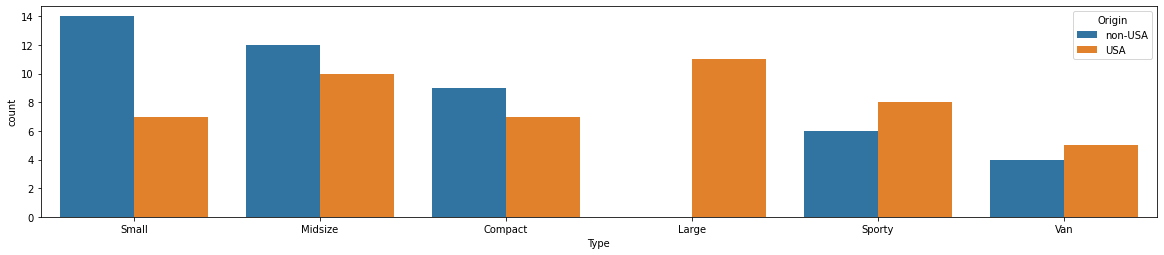

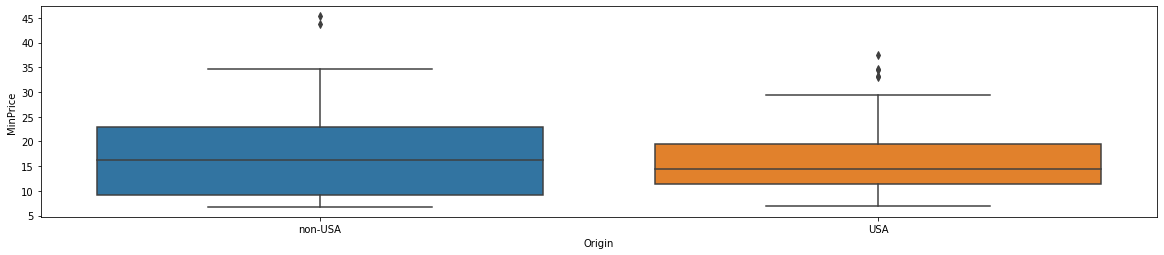

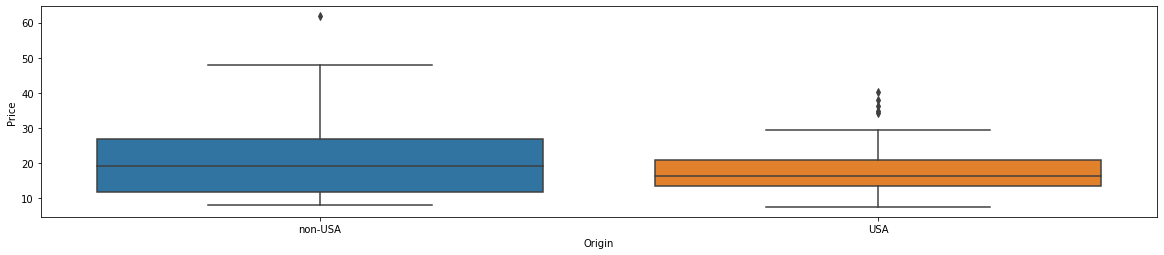

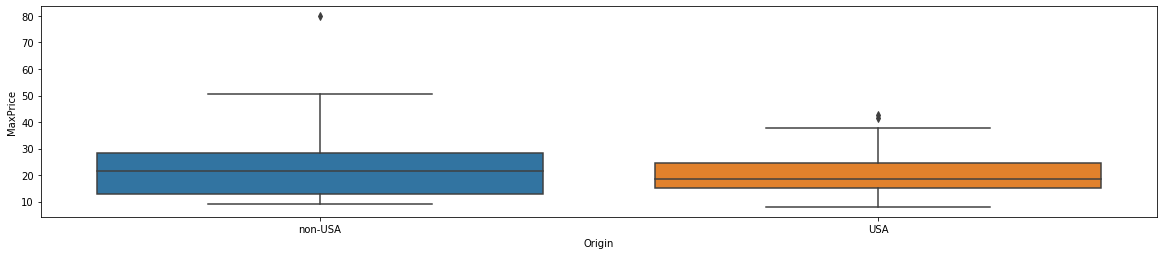

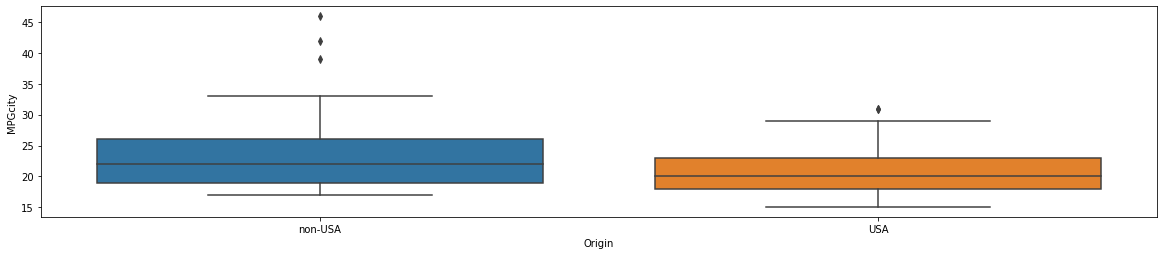

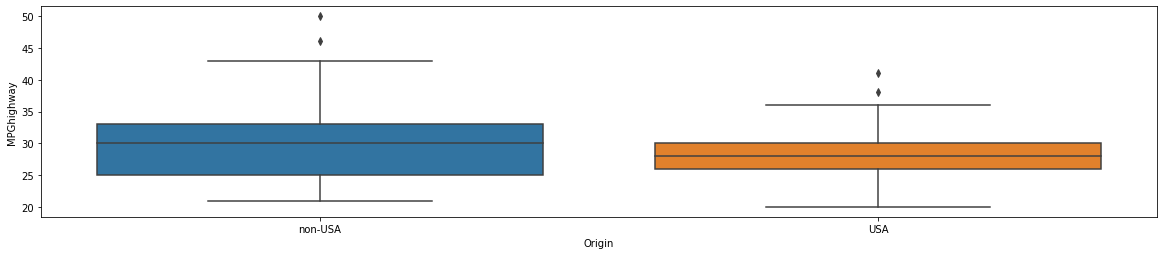

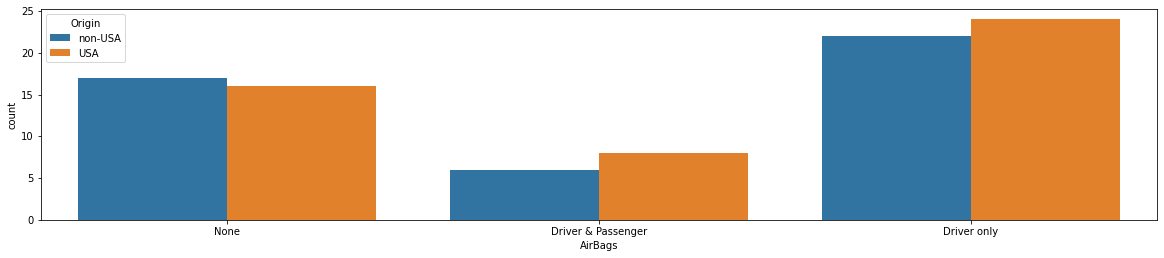

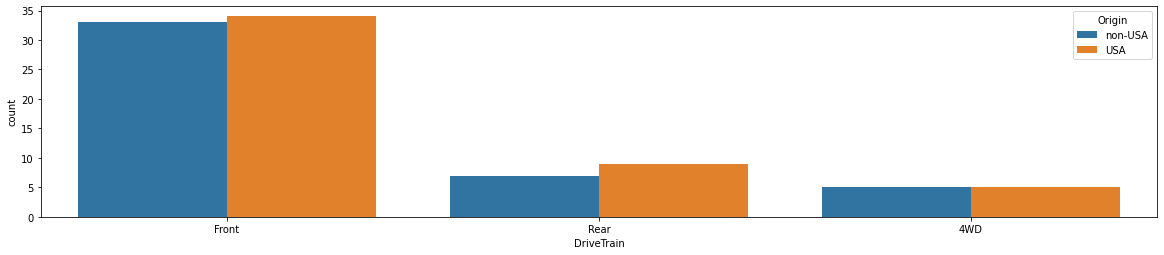

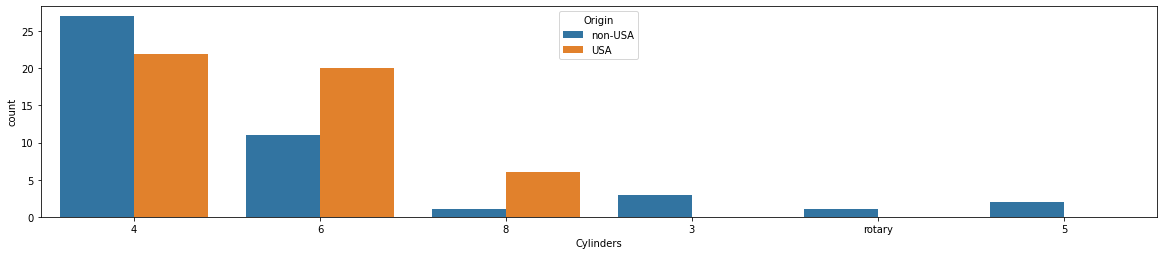

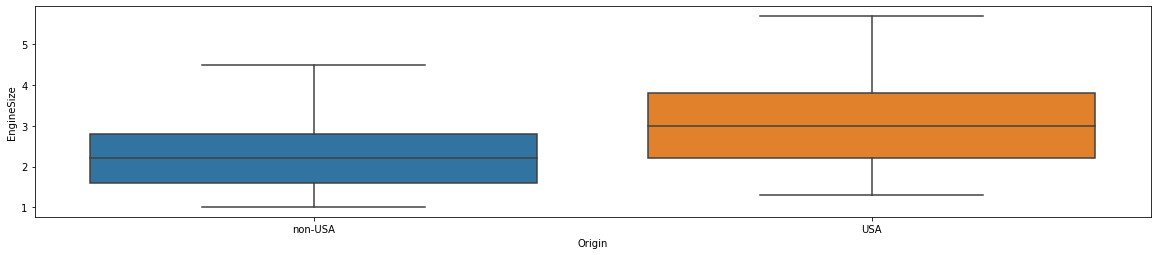

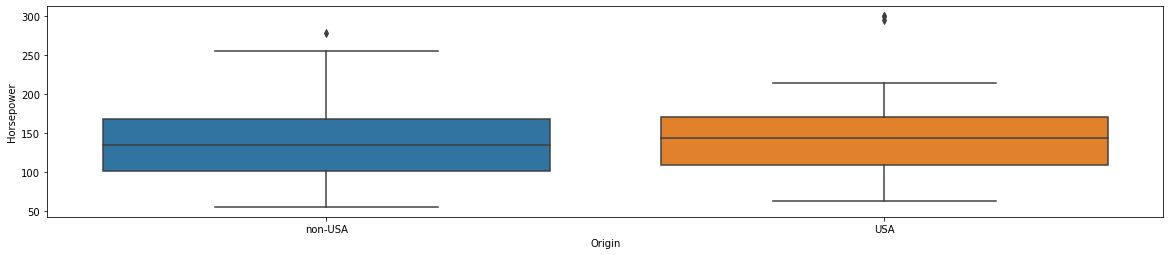

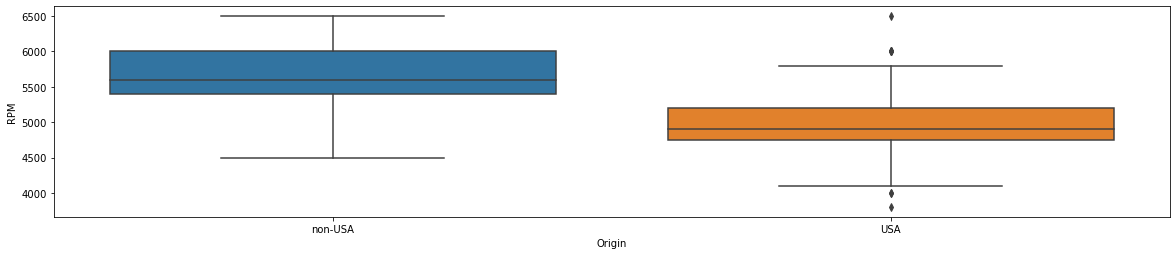

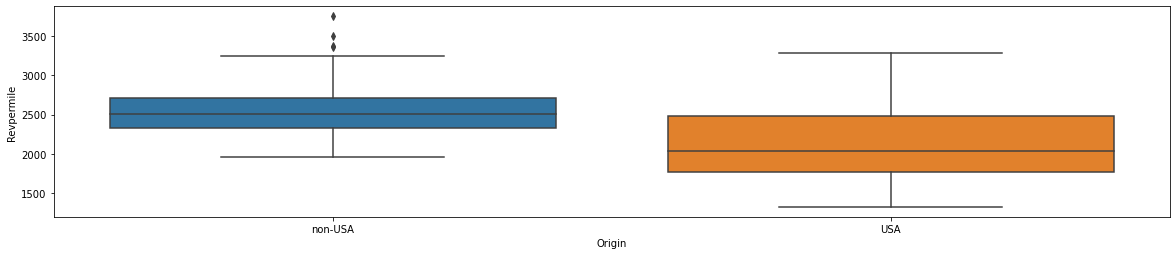

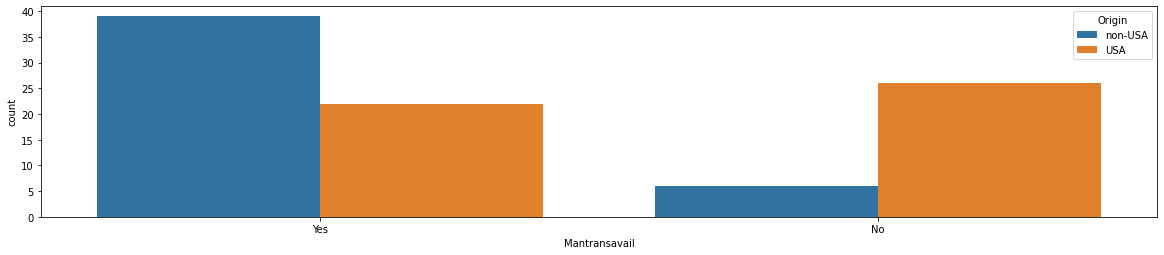

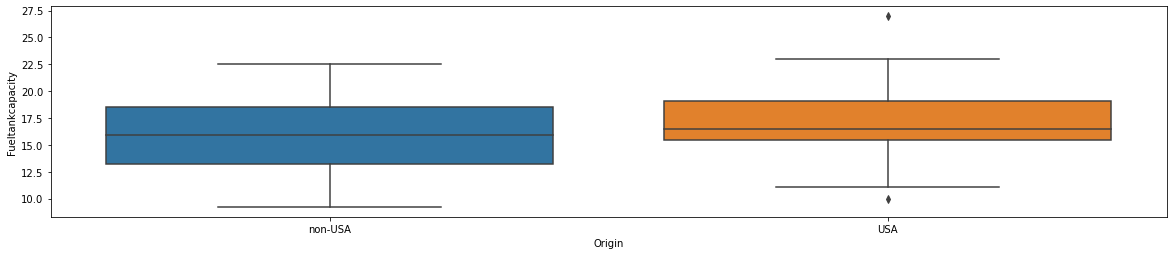

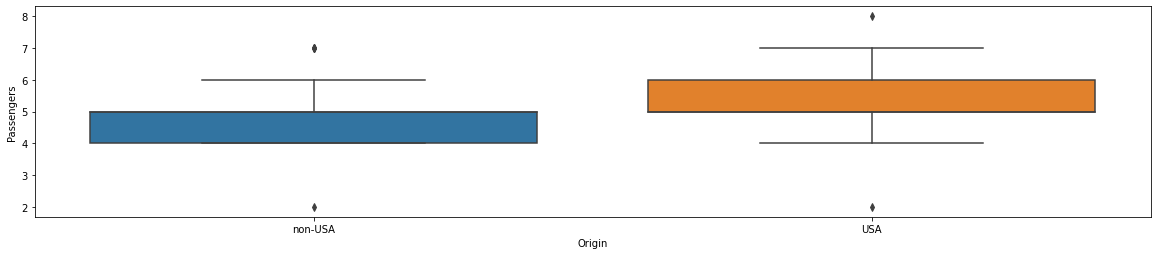

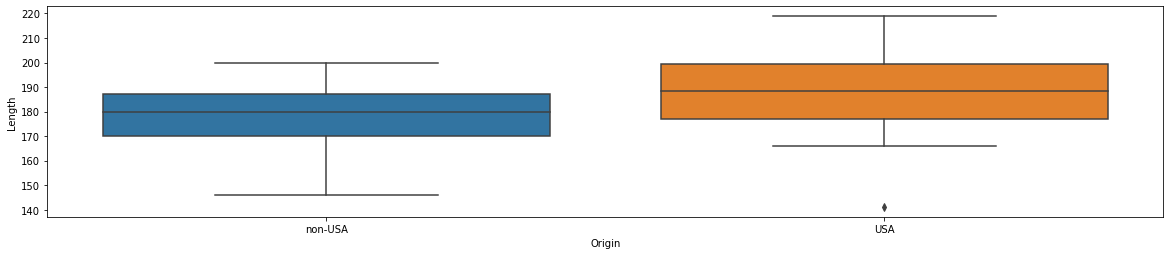

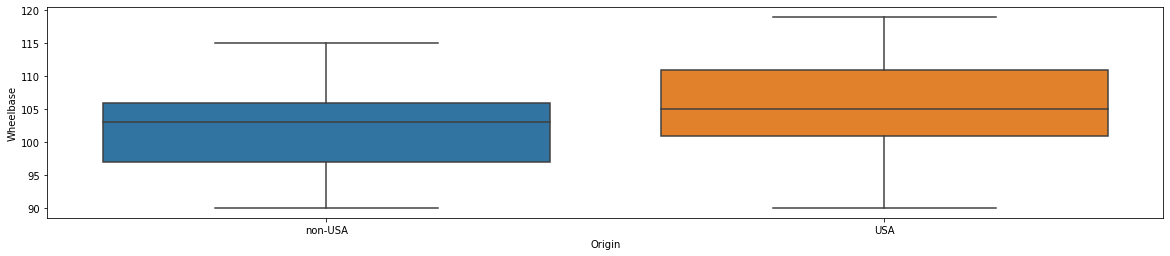

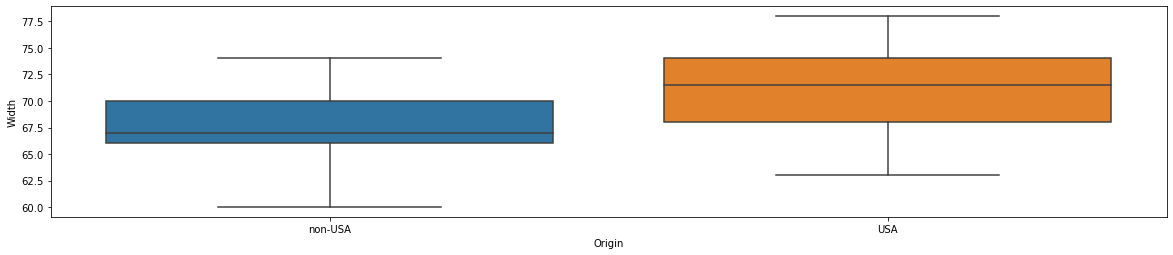

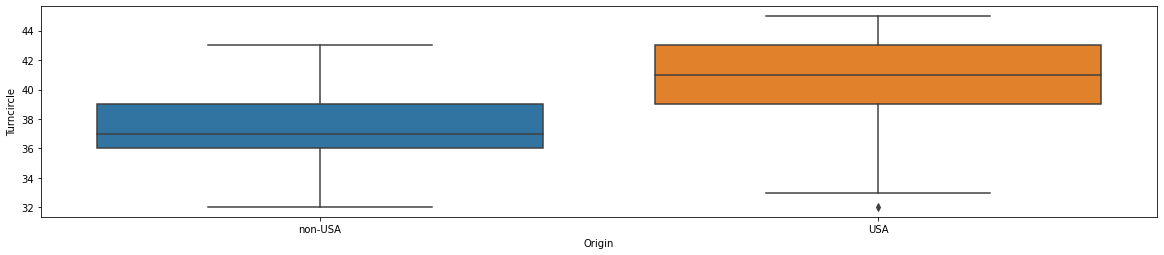

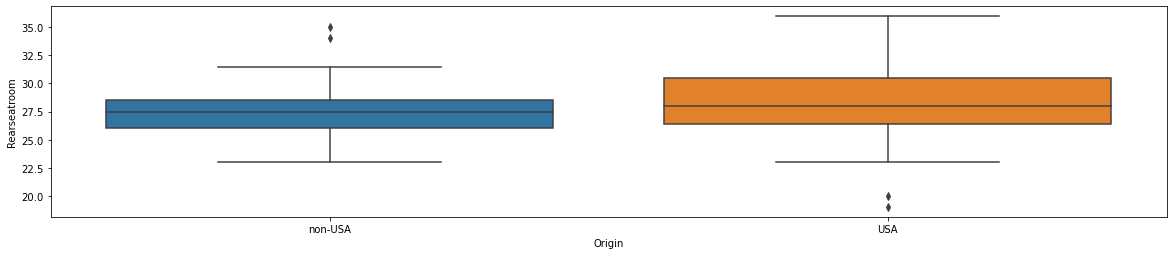

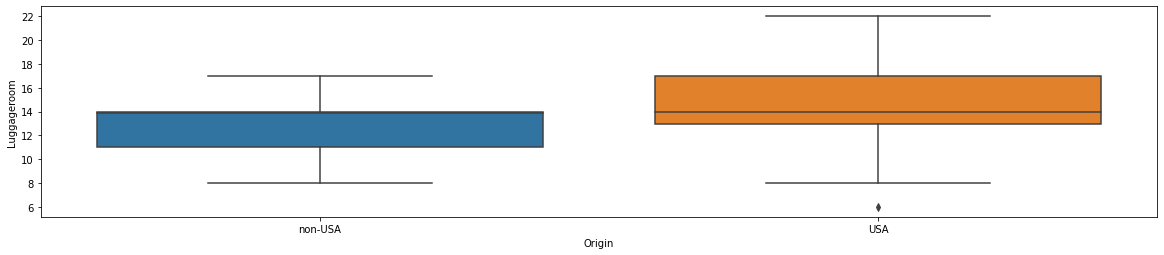

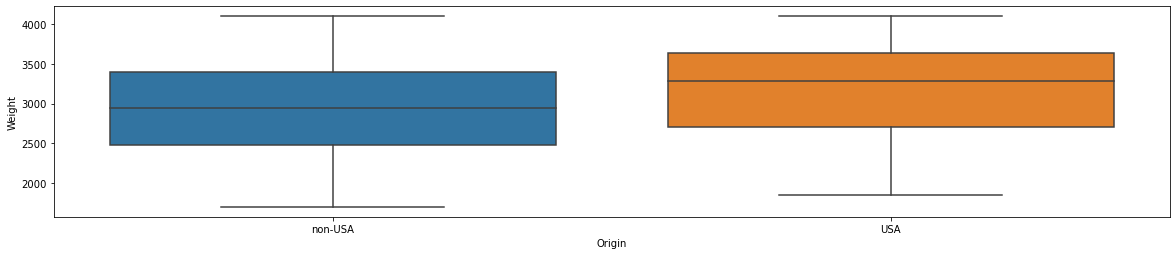

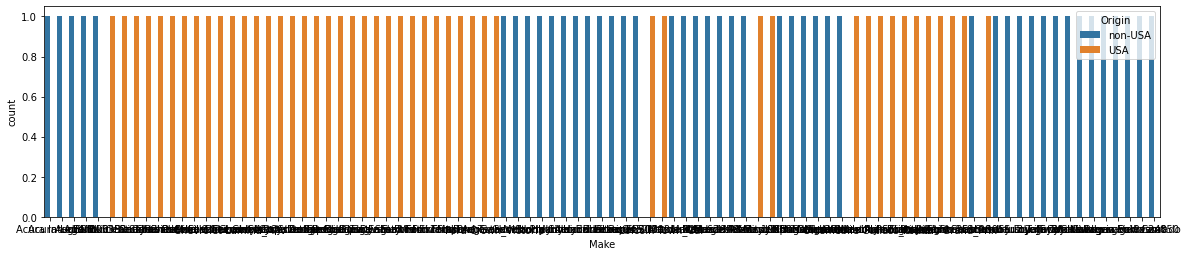

In [23]:
x=1
import matplotlib.pyplot as plt
import seaborn as sns
for i in X.columns:
    plt.figure(figsize=(20,120))
    if X[i].dtypes=='object':
        plt.subplot(26,1,x)
        x=x+1
        sns.countplot(X[i],hue=Y.Origin)
        plt.show()
    else:
        plt.subplot(26,1,x)
        x=x+1
        sns.boxplot(Y.Origin,X[i])
        plt.show()      

## Used ANOVA and discarded columns on the basis of P value

In [30]:
def ANOVA(df,cat,con):
    from pandas import DataFrame
    from statsmodels.api import OLS
    from statsmodels.formula.api import ols
    rel=con+'~'+cat
    model=ols(rel,df).fit()
    from statsmodels.stats.anova import anova_lm
    anovaresults=anova_lm(model)
    Q=DataFrame(anovaresults)
    a=Q["PR(>F)"][cat]
    return round(a,3)

In [31]:
#create list named IMPORTANT COLUMNS
imp_col=[]
for i in X.columns:
    if(X[i].dtypes!='object'):
        x=ANOVA(A,'Origin',i)
        if(x<0.05):
            print('origin vs ',i,'--> ',x)
            imp_col.append(i)

origin vs  MPGcity -->  0.012
origin vs  EngineSize -->  0.0
origin vs  RPM -->  0.0
origin vs  Revpermile -->  0.0
origin vs  Passengers -->  0.017
origin vs  Length -->  0.0
origin vs  Wheelbase -->  0.008
origin vs  Width -->  0.0
origin vs  Turncircle -->  0.0
origin vs  Luggageroom -->  0.002
origin vs  Weight -->  0.038


In [32]:
imp_col

['MPGcity',
 'EngineSize',
 'RPM',
 'Revpermile',
 'Passengers',
 'Length',
 'Wheelbase',
 'Width',
 'Turncircle',
 'Luggageroom',
 'Weight']

## Feature Selection For Catogarical Columns and Used Chi Square

In [33]:
from scipy.stats import chi2_contingency
def chisquare(df,cat1,cat2):
    import pandas as pd
    ct = pd.crosstab(df[cat1],df[cat2])
    a,b,c,d=chi2_contingency(ct)
    return b


In [34]:
for i in X.columns:
    if(X[i].dtypes=='object'):
        p=chisquare(A,'Origin',i)
        if(p<0.05):
            print("Origin vs ",i,'--> ',p)
            imp_col.append(i)

Origin vs  Manufacturer -->  4.122990295732623e-08
Origin vs  Type -->  0.015110051037674505
Origin vs  Cylinders -->  0.027311274054126932
Origin vs  Mantransavail -->  8.71164011659194e-05


In [35]:
imp_col

['MPGcity',
 'EngineSize',
 'RPM',
 'Revpermile',
 'Passengers',
 'Length',
 'Wheelbase',
 'Width',
 'Turncircle',
 'Luggageroom',
 'Weight',
 'Manufacturer',
 'Type',
 'Cylinders',
 'Mantransavail']

### Preprocessing

In [36]:
cat=[]
con=[]
for i in imp_col:
    if X[i].dtypes=='object':
        cat.append(i)
    else:
        con.append(i)


In [37]:
cat

['Manufacturer', 'Type', 'Cylinders', 'Mantransavail']

In [39]:
X1=pd.get_dummies(X[cat])
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X2=pd.DataFrame(ss.fit_transform(X[con]),columns=con)
Xnew=X2.join(X1)
Xnew.head(20)

,MPGcity,EngineSize,RPM,Revpermile,Passengers,Length,Wheelbase,Width,Turncircle,Luggageroom,...,Type_Sporty,Type_Van,Cylinders_3,Cylinders_4,Cylinders_5,Cylinders_6,Cylinders_8,Cylinders_rotary,Mantransavail_No,Mantransavail_Yes
0,0.471312,-0.841022,1.717489,1.129530,-0.083243,-0.427186,-0.286932,-0.366184,-0.610436,-1.033015,...,0,0,0,1,0,0,0,0,0,1
1,-0.781032,0.515869,0.369586,0.005661,-0.083243,0.812171,1.629649,0.431983,-0.298510,0.396643,...,0,0,0,0,0,1,0,0,0,1
2,-0.423219,0.128186,0.369586,-0.105713,-0.083243,-0.220626,-0.286932,-0.632239,-0.610436,0.039228,...,0,0,0,0,0,1,0,0,0,1
3,-0.602126,0.128186,0.369586,0.410659,0.884457,0.674465,0.302785,0.165927,-0.610436,1.111472,...,0,0,0,0,0,1,0,0,0,1
4,-0.065407,0.806631,0.706562,0.430909,-1.050944,0.192493,0.745073,-0.100128,0.013416,-0.318186,...,0,0,0,1,0,0,0,0,0,1
5,-0.065407,-0.453339,-0.135877,0.471409,0.884457,0.399052,0.155356,-0.100128,0.637268,0.754057,...,0,0,0,1,0,0,0,0,1,0
6,-0.602126,1.097393,-0.809828,-1.543455,0.884457,1.156437,1.039932,1.230149,0.949194,1.111472,...,0,0,0,0,0,1,0,0,1,0
7,-1.138845,2.938887,-2.157731,-2.049702,0.884457,2.258087,1.777079,2.294371,1.884972,2.541130,...,0,0,0,0,0,1,0,0,1,0
8,-0.602126,1.097393,-0.809828,-1.300456,-0.083243,1.018731,0.597644,0.964094,0.637268,0.039228,...,0,0,0,0,0,1,0,0,1,0
9,-1.138845,2.163521,-1.989243,-1.664954,0.884457,1.569556,1.482220,0.964094,1.261120,1.468886,...,0,0,0,0,0,0,1,0,1,0


## Split data into train and test set

In [40]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=23)

## Model training and Evaluation

In [41]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
model=lr.fit(xtrain,ytrain)
pred_tr=model.predict(xtrain)
pred_ts=model.predict(xtest)
from sklearn.metrics import accuracy_score,confusion_matrix

In [42]:
tr_err=accuracy_score(pred_tr,ytrain)
ts_err=accuracy_score(pred_ts,ytest)

In [43]:
tr_err

0.972972972972973

In [44]:
ts_err

0.8947368421052632